In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/yufei/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
img1 = plt.imread('./ADEtest/images/training/ADE_train_00000001.jpg')


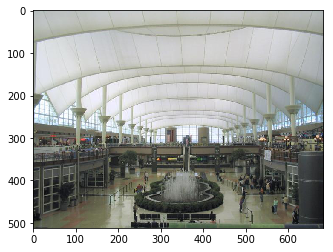

In [3]:
plt.imshow(img1)
plt.show()

In [4]:
anno = plt.imread('./ADEtest/annotations/training/ADE_train_00000001.png')

In [5]:
anno*255

array([[0., 0., 0., ..., 6., 6., 6.],
       [0., 0., 6., ..., 6., 6., 6.],
       [0., 0., 6., ..., 6., 6., 6.],
       ...,
       [4., 4., 4., ..., 1., 1., 0.],
       [4., 4., 4., ..., 1., 1., 0.],
       [4., 4., 4., ..., 1., 1., 1.]], dtype=float32)

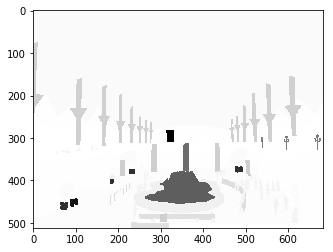

In [6]:
plt.imshow(anno,cmap='Greys')
plt.show()

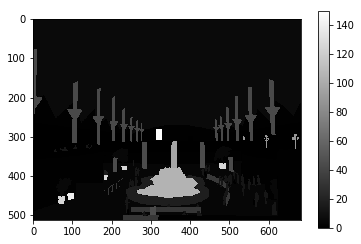

In [41]:
plt.imshow(anno*255, cmap='gray')
plt.colorbar()

In [8]:
s = set()
for i in anno.ravel()*255:
    s.add(i)

In [9]:
s

{0.0,
 1.0,
 4.0,
 5.0,
 6.0,
 13.0,
 18.0,
 32.0,
 33.0,
 43.0,
 44.0,
 88.0,
 97.0,
 105.0,
 126.0,
 139.0,
 150.0}

In [37]:
reanno = misc.imresize(anno,[224, 224], interp='nearest')

/home/yufei/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


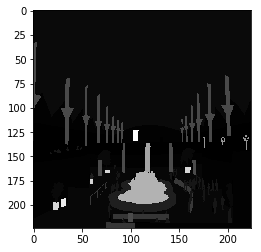

In [42]:
plt.imshow(reanno, cmap='gray')

In [43]:
s = set()
for i in reanno.ravel()*255:
    s.add(i)
s

{0, 1, 20, 42, 78, 91, 106, 181, 183, 200, 202, 225, 234, 246, 247, 249, 254}

In [45]:
reanno

array([[ 0, 10, 10, ..., 10, 10, 10],
       [ 0, 10, 10, ..., 10, 10, 10],
       [ 0, 10, 10, ..., 10, 10, 10],
       ...,
       [ 7,  7,  7, ...,  2,  2,  2],
       [ 7,  7,  7, ...,  2,  2,  2],
       [ 7,  7,  7, ...,  2,  2,  2]], dtype=uint8)

In [10]:
class Batch:
    file_ls = []
    data = []
    
    def pp(self):
        print self.file_ls

In [11]:
b = Batch()

In [12]:
b.file_ls

[]

In [13]:
b.pp()

[]


In [14]:
#dropout函数的实现
def dropout(x, level):
    if level < 0. or level >= 1:#level是概率值，必须在0~1之间
        raise Exception('Dropout level must be in interval [0, 1[.')
    retain_prob = 1. - level
    #我们通过binomial函数，生成与x一样的维数向量。binomial函数就像抛硬币一样，我们可以把每个神经元当做抛硬币一样
    #硬币 正面的概率为p，n表示每个神经元试验的次数
    #因为我们每个神经元只需要抛一次就可以了所以n=1，size参数是我们有多少个硬币。
    sample=np.random.binomial(n=1,p=retain_prob,size=x.shape)#即将生成一个0、1分布的向量，0表示这个神经元被屏蔽，不工作了，也就是dropout了
    #print sample
    x *=sample#0、1与x相乘，我们就可以屏蔽某些神经元，让它们的值变为0
	#print x
    x /= retain_prob
    return x
#对dropout的测试，大家可以跑一下上面的函数，了解一个输入x向量，经过dropout的结果
#dropout(x,0.4)

In [15]:
y=np.asarray([1,2,3,4,5,6,7,8,9,10],dtype=np.float32)


In [16]:
a = np.zeros(10)
for i in range(10000):
    a+=dropout(y.copy(), 0.4)
a/10000.0

array([ 1.00799998,  2.01199995,  3.042     ,  3.94333324,  4.97333314,
        5.986     ,  6.98949962,  8.05999981,  8.92199943, 10.06999962])

In [17]:
a = np.zeros(10)
for i in range(10000):
    a+=dropout(y.copy(), 0.4)
a/10000.0

array([ 1.00533331,  2.01333329,  3.0095    ,  4.0539999 ,  4.94083314,
        6.046     ,  7.00583295,  7.96933314,  9.04649942, 10.02833295])

In [18]:
1/0.6

1.6666666666666667

In [19]:
img = plt.imread('../Desktop/dataset/10.bmp')

In [20]:
img.shape

(966, 1280)

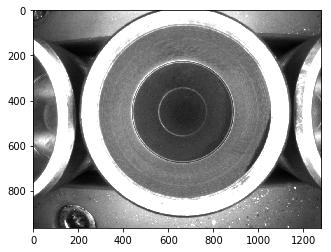

In [21]:
plt.imshow(img, cmap='gray')
plt.show()

In [22]:
import scipy.misc as misc


In [23]:
resize_image = misc.imresize(img,[224, 224], interp='nearest')

/home/yufei/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


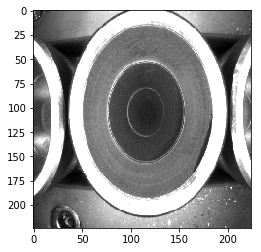

In [24]:
plt.imshow(resize_image, cmap='gray')

In [25]:
resize_image 

array([[ 30,  76, 121, ...,  90,  87,  83],
       [ 30, 135,  99, ...,  92,  87,  84],
       [ 34, 167,  84, ...,  88,  86,  87],
       ...,
       [ 50,  48,  55, ...,  65,  65,  66],
       [ 52,  53,  56, ...,  70,  71,  68],
       [ 50,  54,  55, ...,  66,  69,  66]], dtype=uint8)

In [26]:
resize_image = misc.imresize(img,[224, 224], interp='nearest')

/home/yufei/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


In [27]:
import skimage

In [32]:
skimage = skimage.transform.resize(img,[224,224], order=0)

/home/yufei/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/yufei/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


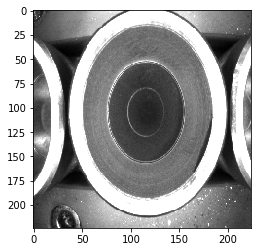

In [36]:
plt.imshow(skimage, cmap = 'gray')
plt.show()